<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Project Part 1</p>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

%matplotlib inline

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
1: Get the data and inspect it</p>
 
**Load the data** into a Pandas Dataframe. **Inspect all the columns**, and <b>read the data dictionary <a href="https://www.kaggle.com/lava18/google-play-store-apps">on Kaggle</a></b> to understand their meaning. **Print the shape of the dataframe and its head**.


In [2]:
df_google_play_store_user_reviews = pd.read_csv("./Google Play Store Apps/googleplaystore_user_reviews.csv")
df_google_play_store = pd.read_csv("./Google Play Store Apps/googleplaystore.csv")
print("DataFrame for Google Play Store User Reviews data:", df_google_play_store_user_reviews.shape)
print("DataFrame for Google Play Store data:", df_google_play_store.shape)

df_google_play_store_user_reviews_head = df_google_play_store_user_reviews.head()
df_google_play_store_head = df_google_play_store.head()
#print(df_google_play_store_user_reviews_head)
#print(df_google_play_store_head)
#df_google_play_store_user_reviews
df_google_play_store

DataFrame for Google Play Store User Reviews data: (64295, 5)
DataFrame for Google Play Store data: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<AxesSubplot:>

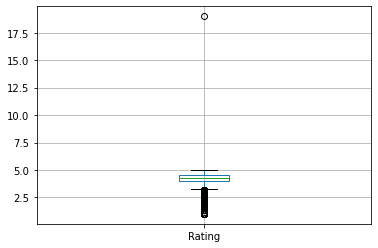

In [3]:
df_google_play_store.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

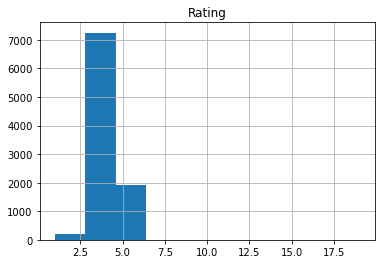

In [4]:
df_google_play_store.hist()

<AxesSubplot:>

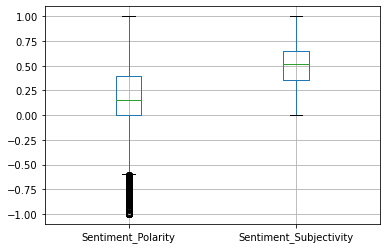

In [5]:
df_google_play_store_user_reviews.boxplot()

array([[<AxesSubplot:title={'center':'Sentiment_Polarity'}>,
        <AxesSubplot:title={'center':'Sentiment_Subjectivity'}>]],
      dtype=object)

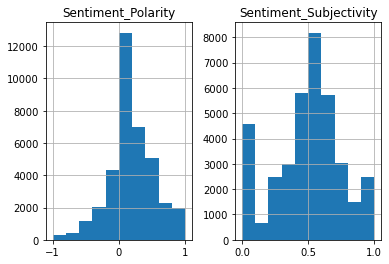

In [6]:
df_google_play_store_user_reviews.hist()

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
2: Clean the data</p>

Next, we want to remove rows with null values, as usual. However, first it may be a good idea to see if there are any columns that we can get rid of. Two reasons for wanting to do this are:<br>
1. If any columns have way too many NaN values, we should get rid of these. If we don't, we'll frivolously remove rows that only have NaN's in these columns, which we don't want to do.
2. Not all columns provide valuable information anyway

**Find the name of the column with the most missing values. Then, drop it from the DataFrame.**<br>
Once these columns are removed, **drop any rows that have NaN in the remaining columns**

In [7]:
# TODO: find column with most missing values
# TODO: drop any remaining rows with NaN
# TODO: drop duplicated rows
for col in df_google_play_store_user_reviews:
    print(col, len(df_google_play_store_user_reviews[df_google_play_store_user_reviews[col].isnull()]))
df_google_play_store_user_reviews = df_google_play_store_user_reviews.drop_duplicates()
df_google_play_store_user_reviews = df_google_play_store_user_reviews.dropna(axis=0)
df_google_play_store_user_reviews.drop(["Translated_Review","Sentiment"], axis=1)
#print(df_google_play_store_user_reviews)

df_new_google_play_store_user_reviews = pd.DataFrame(columns = ["App_name", "Sentiment_Polarity", "Sentiment_Subjectivity"]) 
#print(df_new_google_play_store_user_reviews)

label_list = df_google_play_store_user_reviews["App"].to_list()
unique_list = df_google_play_store_user_reviews["App"].unique()
    
for i in range(0,len(unique_list)):
    num = 0
    sum_Sentiment_Polarity = 0
    sum_Sentiment_Subjectivity = 0
    for j in range(0, len(label_list)):
        if label_list[j] == unique_list[i]:
            num += 1
            sum_Sentiment_Polarity += df_google_play_store_user_reviews["Sentiment_Polarity"].to_list()[j]
            sum_Sentiment_Subjectivity += df_google_play_store_user_reviews["Sentiment_Subjectivity"].to_list()[j]
    df_new_google_play_store_user_reviews = df_new_google_play_store_user_reviews.append({'App_name' : unique_list[i], 'Sentiment_Polarity' : sum_Sentiment_Polarity/num, 'Sentiment_Subjectivity' : sum_Sentiment_Subjectivity/num}, ignore_index = True)

#df_new_google_play_store_user_reviews = df_new_google_play_store_user_reviews.drop_duplicates("App_name", keep='last')
print(df_new_google_play_store_user_reviews.head())
print(df_new_google_play_store_user_reviews.shape)

App 0
Translated_Review 26868
Sentiment 26863
Sentiment_Polarity 26863
Sentiment_Subjectivity 26863
                           App_name  Sentiment_Polarity  \
0             10 Best Foods for You            0.465906   
1  104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室            0.358227   
2                              11st            0.185943   
3        1800 Contacts - Lens Store            0.318145   
4   1LINE – One Line with One Touch            0.196290   

   Sentiment_Subjectivity  
0                0.493254  
1                0.508907  
2                0.455340  
3                0.591098  
4                0.557315  
(865, 3)


In [8]:
# TODO: find column with most missing values
# TODO: drop any remaining rows with NaN
# TODO: drop duplicated rows

for col in df_google_play_store:
    print(col, len(df_google_play_store[df_google_play_store[col].isnull()]))   

df_google_play_store = df_google_play_store.dropna(axis=0)
df_google_play_store = df_google_play_store.drop_duplicates("App", keep='last')
#df_google_play_store[np.isfinite(pd.to_numeric(df_google_play_store.Installs, errors="coerce"))]
df_google_play_store.Installs = df_google_play_store.Installs.str.replace('+','')
df_google_play_store.Installs = df_google_play_store.Installs.str.replace(',','')
#df_google_play_store.drop(["Translated_Review","Sentiment"], axis=1)
#print(df_google_play_store_user_reviews)
print(df_google_play_store.shape)   
print(df_google_play_store.head())

df_google_play_store["Content_Rating"] = df_google_play_store["Content Rating"]
df_google_play_store
df_google_play_store.Rating.max()

App 0
Category 0
Rating 1474
Reviews 0
Size 0
Installs 0
Type 1
Price 0
Content Rating 1
Genres 0
Last Updated 0
Current Ver 8
Android Ver 3
(8190, 13)
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

  Reviews  Size  Installs  Type Price Content Rating                   Genres  \
0     159   19M     10000  Free     0       Everyone             Art & Design   
2   87510  8.7M   5000000  Free     0       Everyone             Art & Design   
3  215644   25M  50000000  Free     0           Teen             Art & Design   
4     967  2.8M    100000  Free     0      

5.0

In [9]:
#Merge two tables togather
df_merge = df_new_google_play_store_user_reviews.merge(df_google_play_store,
                 how = "inner",
                 left_on = "App_name",
                 right_on = "App")
df_merge = df_merge.drop(["App", "Last Updated", "Current Ver", "Android Ver", "Content Rating"],1)
df_merge = df_merge.drop_duplicates("App_name", keep='last')
df_merge = df_merge.dropna(axis=0)
print(df_merge.shape)
df_merge.head()
#df_merge

(816, 12)


,App_name,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Content_Rating
0,10 Best Foods for You,0.465906,0.493254,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Health & Fitness,Everyone 10+
1,11st,0.185943,0.455340,SHOPPING,3.8,48732,20M,10000000,Free,0,Shopping,Everyone
2,1800 Contacts - Lens Store,0.318145,0.591098,MEDICAL,4.7,23160,26M,1000000,Free,0,Medical,Everyone
3,1LINE – One Line with One Touch,0.196290,0.557315,GAME,4.6,214878,10M,10000000,Free,0,Board,Everyone
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.423659,0.512356,PERSONALIZATION,4.2,115773,Varies with device,10000000,Free,0,Personalization,Everyone


In [10]:
# Convert Reviews and Installs to number.
df_merge["Reviews"] = df_merge["Reviews"].apply(pd.to_numeric, downcast='float', errors='coerce')
df_merge["Installs"] = df_merge["Installs"].apply(pd.to_numeric, downcast='float', errors='coerce')
df_merge

,App_name,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Content_Rating
0,10 Best Foods for You,0.465906,0.493254,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0,Health & Fitness,Everyone 10+
1,11st,0.185943,0.455340,SHOPPING,3.8,48732.0,20M,10000000.0,Free,0,Shopping,Everyone
2,1800 Contacts - Lens Store,0.318145,0.591098,MEDICAL,4.7,23160.0,26M,1000000.0,Free,0,Medical,Everyone
3,1LINE – One Line with One Touch,0.196290,0.557315,GAME,4.6,214878.0,10M,10000000.0,Free,0,Board,Everyone
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.423659,0.512356,PERSONALIZATION,4.2,115773.0,Varies with device,10000000.0,Free,0,Personalization,Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...
811,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.098559,0.525508,TRAVEL_AND_LOCAL,4.5,260133.0,Varies with device,10000000.0,Free,0,Travel & Local,Everyone
812,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.223750,0.380365,TOOLS,4.2,1116393.0,8.2M,50000000.0,Free,0,Tools,Everyone
813,Hotstar,0.038178,0.493964,ENTERTAINMENT,4.3,4885646.0,Varies with device,100000000.0,Free,0,Entertainment,Teen
814,Hotwire Hotel & Car Rental App,0.187029,0.459717,TRAVEL_AND_LOCAL,4.3,10323.0,Varies with device,1000000.0,Free,0,Travel & Local,Everyone


<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
3: Do Some Visualizations</p>

First, Generate a histogram plot with 100 bins of the merged data.<br> 
<b>Build <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib hisograms</a></b> for Rating/Reviews/Sentiment_Polarity/Sentiment_Subjectivity by first. For the histogram(s)
<ul>
    <li>x-axis is </li>
    <li>y-axis is frenquency</li>
    <li>The number of buckets you choose for the histogram is up to you</li>
</ul>


*Note: Remember to title your plots and label all your axes!*

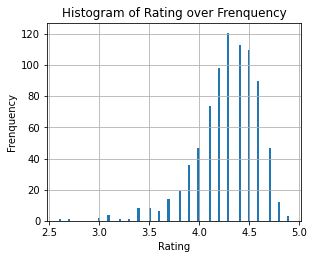

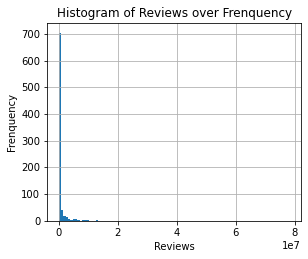

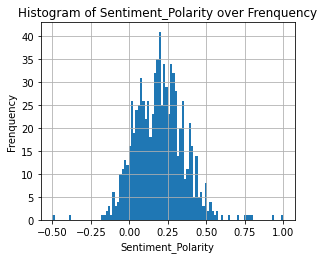

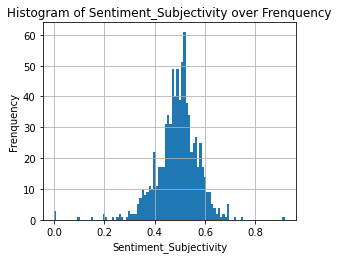

,App_name,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Content_Rating
0,10 Best Foods for You,0.465906,0.493254,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0,Health & Fitness,Everyone 10+
1,11st,0.185943,0.455340,SHOPPING,3.8,48732.0,20M,10000000.0,Free,0,Shopping,Everyone
2,1800 Contacts - Lens Store,0.318145,0.591098,MEDICAL,4.7,23160.0,26M,1000000.0,Free,0,Medical,Everyone
3,1LINE – One Line with One Touch,0.196290,0.557315,GAME,4.6,214878.0,10M,10000000.0,Free,0,Board,Everyone
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.423659,0.512356,PERSONALIZATION,4.2,115773.0,Varies with device,10000000.0,Free,0,Personalization,Everyone


In [11]:
# TODO: get ages of first, second and third class passengers
# TODO: try plotting them on one histogram vs. three (the only difference is plt.show() in bewteen calls to hist())
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.hist(df_merge['Rating'], bins=100)
plt.title("Histogram of Rating over Frenquency")
plt.xlabel("Rating")
plt.ylabel("Frenquency")
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2, 2, 2)
plt.hist(df_merge['Reviews'], bins=100)
plt.title("Histogram of Reviews over Frenquency")
plt.xlabel("Reviews")
plt.ylabel("Frenquency")
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2, 2, 3)
plt.hist(df_merge['Sentiment_Polarity'], bins=100)
plt.title("Histogram of Sentiment_Polarity over Frenquency")
plt.xlabel("Sentiment_Polarity")
plt.ylabel("Frenquency")
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2, 2, 4)
plt.hist(df_merge['Sentiment_Subjectivity'], bins=100)
plt.title("Histogram of Sentiment_Subjectivity over Frenquency")
plt.xlabel("Sentiment_Subjectivity")
plt.ylabel("Frenquency")
plt.grid()
plt.show()

df_merge.head()

Generate bar chart. Build <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib bar charts</a></b> where:<br>
<ul>
    <li>x-axis is Type/Content_Rating</li>
    <li>y-axis is frenquency</li>
</ul>

Free    807
Paid      9
Name: Type, dtype: int64
['Everyone 10+' 'Everyone' 'Mature 17+' 'Teen' 'Adults only 18+']
Free    807
Paid      9
Name: Type, dtype: int64


Text(0.5, 1.0, 'Frenquency per Content_Rating')

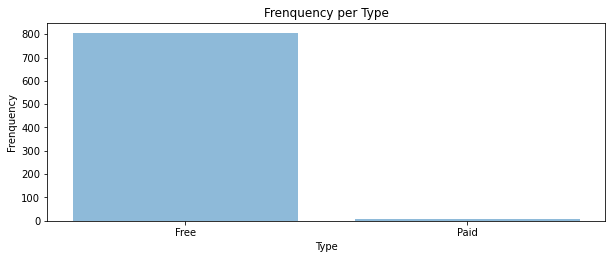

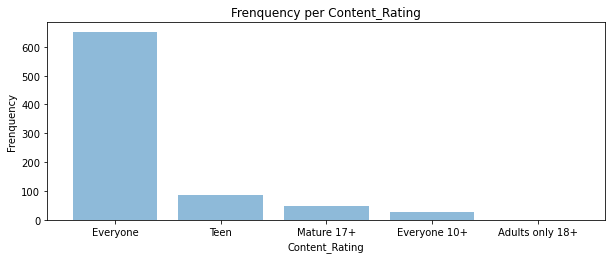

In [12]:
# TODO: Plot the bar chart
Type = df_merge.Type.value_counts()
print(Type)

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.bar([0,1], Type, align='center', alpha=0.5)
plt.xticks(range(0, len(Type)), list(Type.index))
plt.ylabel('Frenquency')
plt.xlabel('Type')
plt.title("Frenquency per Type")

print(df_merge.Content_Rating.unique())

CT = df_merge.Content_Rating.value_counts()
print(Type)

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2)
plt.bar([0,1,2,3,4], CT, align='center', alpha=0.5)
plt.xticks(range(0, len(CT)), list(CT.index))
plt.ylabel('Frenquency')
plt.xlabel('Content_Rating')
plt.title("Frenquency per Content_Rating")

In [13]:
df_merge

,App_name,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Content_Rating
0,10 Best Foods for You,0.465906,0.493254,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0,Health & Fitness,Everyone 10+
1,11st,0.185943,0.455340,SHOPPING,3.8,48732.0,20M,10000000.0,Free,0,Shopping,Everyone
2,1800 Contacts - Lens Store,0.318145,0.591098,MEDICAL,4.7,23160.0,26M,1000000.0,Free,0,Medical,Everyone
3,1LINE – One Line with One Touch,0.196290,0.557315,GAME,4.6,214878.0,10M,10000000.0,Free,0,Board,Everyone
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.423659,0.512356,PERSONALIZATION,4.2,115773.0,Varies with device,10000000.0,Free,0,Personalization,Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...
811,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.098559,0.525508,TRAVEL_AND_LOCAL,4.5,260133.0,Varies with device,10000000.0,Free,0,Travel & Local,Everyone
812,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.223750,0.380365,TOOLS,4.2,1116393.0,8.2M,50000000.0,Free,0,Tools,Everyone
813,Hotstar,0.038178,0.493964,ENTERTAINMENT,4.3,4885646.0,Varies with device,100000000.0,Free,0,Entertainment,Teen
814,Hotwire Hotel & Car Rental App,0.187029,0.459717,TRAVEL_AND_LOCAL,4.3,10323.0,Varies with device,1000000.0,Free,0,Travel & Local,Everyone


Time for a more morbid visualization. Build one <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib bar chart</a></b> that represents rating for Free and Paid. This will requre you to plot 4 bars in total, where two bars will overlay the other two.
<ul>
    <li>x-axis is type</li>
    <li>y-axis is counts</li>
    <li>2 bars for each gender<ul>
        <li>One bar represents total number</li>
        <li>One bar represents Rating number</li></ul>
    </li>
</ul>


Free Rating: 1.0
paid Rating: 0.8166047087980174


Text(0.5, 1.0, 'Type over Rating')

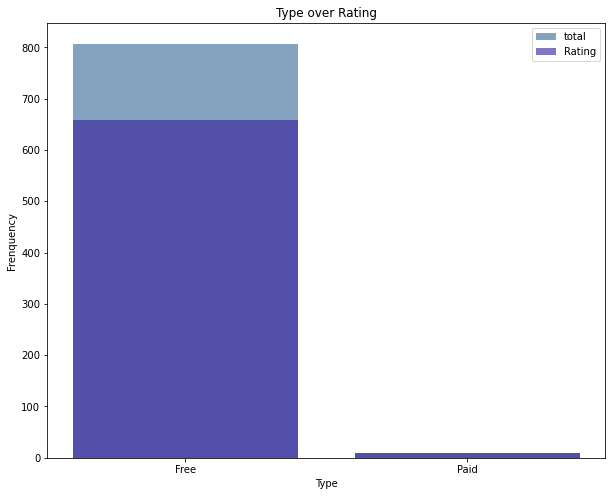

In [14]:
# TODO: Plot 4 bars

f_count = len(df_merge[df_merge.Type == 'Free'])
f_survived = len(df_merge[(df_merge.Type == 'Free') & (df_merge.Rating > 4.0)])
f_percentage = f_survived*1.0/f_count

m_count = len(df_merge[df_merge.Type == 'Paid'])
m_survived = len(df_merge[(df_merge.Type == 'Paid') & (df_merge.Rating > 4.0)])
m_percentage = m_survived*1.0/m_count

print('Free Rating:', m_percentage)
print('paid Rating:', f_percentage)

plt.figure(figsize=(10,8))
plt.bar([0,1], [f_count, m_count], align='center', color=(0.2, 0.4, 0.6, 0.6), label='total')
plt.bar([0,1], [f_survived, m_survived], align='center', color=(0.2, 0.1, 0.6, 0.6), label='Rating')
plt.legend(loc='best')
plt.xticks([0,1], ['Free', 'Paid'])
plt.ylabel('Frenquency')
plt.xlabel('Type')
plt.title("Type over Rating")

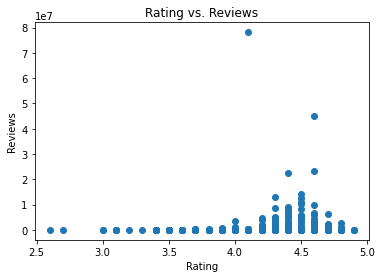

In [15]:
plt.scatter(x=df_merge['Rating'], y=df_merge['Reviews'])
plt.title('Rating vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

In [16]:
np.corrcoef(df_merge['Rating'],df_merge['Reviews'])

array([[1.       , 0.0771953],
       [0.0771953, 1.       ]])

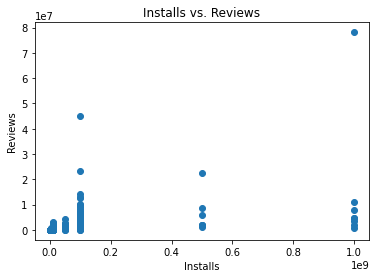

In [17]:
plt.scatter(x=df_merge['Installs'], y=df_merge['Reviews'])
plt.title('Installs vs. Reviews')
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.show()

In [18]:
np.corrcoef(df_merge['Installs'],df_merge['Reviews'])

array([[1.        , 0.46651702],
       [0.46651702, 1.        ]])

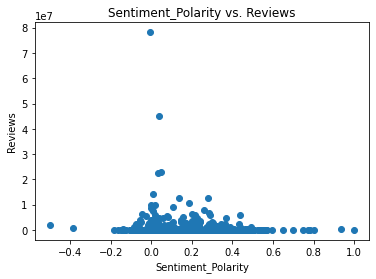

In [19]:
plt.scatter(x=df_merge['Sentiment_Polarity'], y=df_merge['Reviews'])
plt.title('Sentiment_Polarity vs. Reviews')
plt.xlabel('Sentiment_Polarity')
plt.ylabel('Reviews')
plt.show()

In [20]:
np.corrcoef(df_merge['Sentiment_Polarity'],df_merge['Reviews'])

array([[ 1.        , -0.12225017],
       [-0.12225017,  1.        ]])

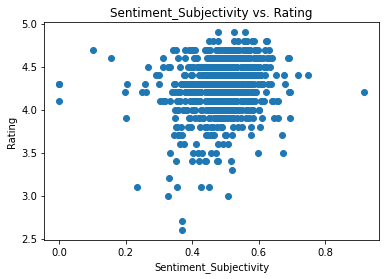

In [21]:
plt.scatter(x=df_merge['Sentiment_Subjectivity'], y=df_merge['Rating'])
plt.title('Sentiment_Subjectivity vs. Rating')
plt.xlabel('Sentiment_Subjectivity')
plt.ylabel('Rating')
plt.show()

In [22]:
np.corrcoef(df_merge['Sentiment_Subjectivity'],df_merge['Rating'])

array([[1.       , 0.2192125],
       [0.2192125, 1.       ]])

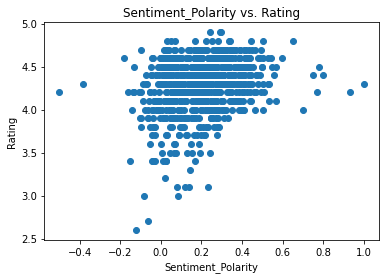

In [23]:
plt.scatter(x=df_merge['Sentiment_Polarity'], y=df_merge['Rating'])
plt.title('Sentiment_Polarity vs. Rating')
plt.xlabel('Sentiment_Polarity')
plt.ylabel('Rating')
plt.show()

In [24]:
np.corrcoef(df_merge['Sentiment_Polarity'],df_merge['Rating'])

array([[1.        , 0.27026759],
       [0.27026759, 1.        ]])

In [25]:
#Data distribution

#Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

#Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

#Approximately symmetric distribution: If the skewness value is between −½ and +½.

In [26]:
print(df_merge.skew())

Sentiment_Polarity         0.407238
Sentiment_Subjectivity    -0.950777
Rating                    -1.254675
Reviews                   14.915484
Installs                   7.527610
dtype: float64


array([[<AxesSubplot:title={'center':'Sentiment_Polarity'}>,
        <AxesSubplot:title={'center':'Sentiment_Subjectivity'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Installs'}>, <AxesSubplot:>]],
      dtype=object)

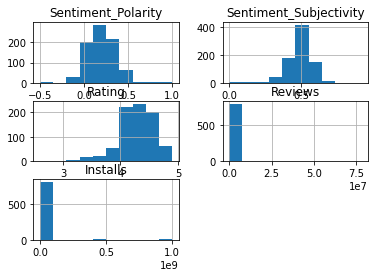

In [27]:
df_merge.hist()

<AxesSubplot:>

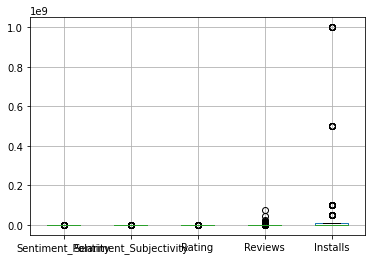

In [28]:
df_merge.boxplot()

In [29]:
# Trends

In [30]:
df_google_play_store_2 = pd.read_csv("./Google Play Store Apps/googleplaystore.csv")
print(df_google_play_store_2.columns)
print("="*80)
print(df_google_play_store_2.head())

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+ 

In [31]:
print(df_google_play_store_2['Category'].unique())
print("="*80)
print(df_google_play_store_2['Type'].unique())
print("="*80)
print(df_google_play_store_2['Content Rating'].unique())
print("="*80)
print(df_google_play_store_2['Genres'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
['Free' 'Paid' nan '0']
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music &

In [32]:
df_google_play_store_2.drop('Genres',axis=1,inplace=True)
df_google_play_store_2 = df_google_play_store_2.drop(df_google_play_store_2[ df_google_play_store_2['Category'] == '1.9' ].index, axis=0)

In [33]:
data=df_google_play_store_2.drop_duplicates(subset=['App'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
dtypes: float64(1), object(11)
memory usage: 981.0+ KB


In [34]:
data['Rating'].fillna(0)
data['Content Rating'].fillna(method='ffill')
data['Current Ver'].fillna(1)
data['Android Ver'].fillna(method='bfill')
data['Type'].fillna('Free')
pass

In [35]:
#print(df['Type'].unique())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
dtypes: float64(1), object(11)
memory usage: 981.0+ KB


<ipython-input-36-68b5a18ad480>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_yticklabels(c.get_yticklabels(), rotation=0, ha="right") #just to check


Text(0.5, 1.0, 'Count of app in different category')

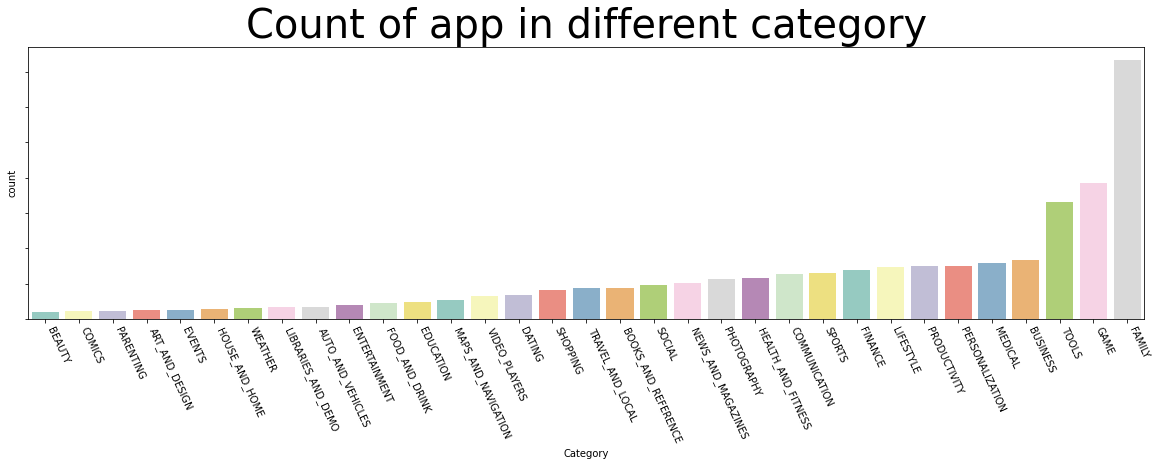

In [36]:
sns.set_context({"figure.figsize": (20, 5)})
c=sns.countplot(x="Category",data=data, palette = "Set3",order=reversed(data['Category'].value_counts().index))
c.set_xticklabels(c.get_xticklabels(), rotation=-65, ha="left")
c.set_yticklabels(c.get_yticklabels(), rotation=0, ha="right") #just to check
plt.title('Count of app in different category',size = 40)

In [37]:
#print(data.groupby("Category").mean().max())

sdf=data.groupby("Category").mean()
sdf['Cat']=sdf.index

print("The category which got the Max rating :",sdf['Rating'].idxmax())
print("The category which got the Min rating :",sdf['Rating'].idxmin())

sx=sdf.loc[sdf['Rating'].idxmax()]               #This will retunr entire row of the max value
si=sdf.loc[sdf['Rating'].idxmin()] 

#print(type(sx))                   #Series

print("Mean rating for",sdf['Rating'].idxmax(),"is : ",sx['Rating'])
print("Mean rating for",sdf['Rating'].idxmin(),"is :",si['Rating'])


#df[df['Rating'] == df['Rating'].max()]       #This one will list all rows that have max Rating

The category which got the Max rating : EVENTS
The category which got the Min rating : DATING
Mean rating for EVENTS is :  4.435555555555557
Mean rating for DATING is : 3.970149253731344


Text(0.5, 1.0, 'Apps by their content ratings')

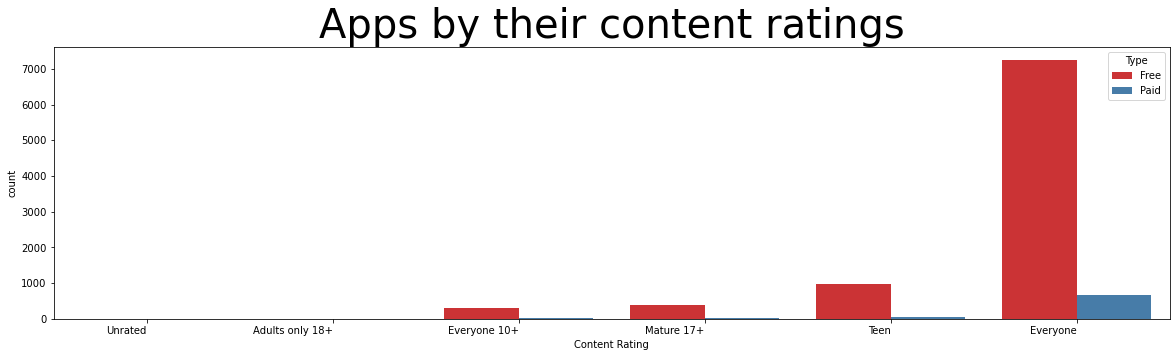

In [57]:
sns.set_context({"figure.figsize": (20, 5)})
c=sns.countplot(x="Content Rating",hue='Type',data=data, palette = "Set1",order=reversed(data['Content Rating'].value_counts().index))
c.set_xticklabels(c.get_xticklabels(), rotation=0, ha="right")
plt.title('Apps by their content ratings',size = 40)

In [39]:
# NLP 

In [40]:
#Selecting reviews and types of reviews.
df=pd.concat([df_google_play_store_user_reviews.Translated_Review,df_google_play_store_user_reviews.Sentiment],axis=1)
df.dropna(axis=0,inplace=True)
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [41]:
df.Sentiment.value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

In [42]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import os
print(os.listdir("../Project Part 1"))

['Day4_Handson_Solution.ipynb', '.DS_Store', 'Day4_ProjectPart1_Bo Yan.ipynb', 'Bo Yan_Project Part 1.key', 'Bo Yan_Project Part 1.pdf', 'Day4_Handson.ipynb', 'titanic_data.csv', '.ipynb_checkpoints', 'Google Play Store Apps', 'Day4-ProjectPart1.pdf']


In [43]:
# Converting review types to int form in order to use classification methods.
# 0= Positive, 1=Negative, 2= Neutral

df.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df.Sentiment]
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",2
9,It helpful site ! It help foods get !,2
10,good you.,0
11,Useful information The amount spelling errors ...,0


In [44]:
# Here we will remove characters which are not letters. ":) # $ @ ()!-/*" like that!

# Also converting them lower case.

#Data cleaning
import re
first_text=df.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

In [45]:
print(df.Translated_Review[0]) #lets review of changings
print(text)


I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  


In [46]:
#stopwords (irrelavent words)
import nltk
#nltk.download("stopwords")
#nltk.download("punkt")
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words

In [47]:
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

In [48]:
#lemmatization books----> book
# convert words to their root format.
import nltk as nlp
nlp.download('wordnet')

lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

[nltk_data] Downloading package wordnet to /Users/boyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

In [49]:
text_list=[]
for i in df.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [50]:
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

In [51]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used words: ",all_words[50:100])

Most used words:  ['aborted', 'aborting', 'abortion', 'abou', 'abousolutely', 'abracadabra', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absorbing', 'abstract', 'abstraction', 'absurd', 'abt', 'abu', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abysmal', 'abyss', 'ac', 'aca', 'academia', 'acc', 'accasionly', 'accelent', 'accelerate', 'acceleration', 'accent', 'accentuates', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'acces', 'accesable', 'access', 'accessabilty']


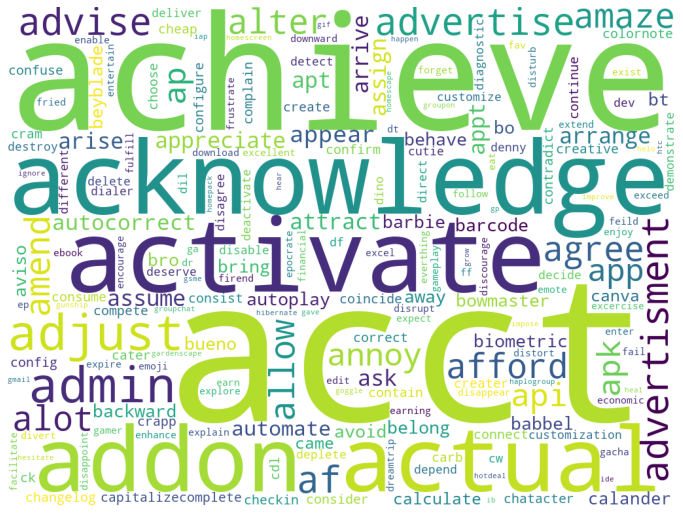

In [52]:
from wordcloud import WordCloud
#WordCloud.download('wordcloud')

plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(all_words[100:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [53]:
#check the python you are using with:
import sys
print(sys.executable)

/Users/boyan/anaconda3/bin/python


<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
4: Predict Rating</p>

Now, **split your labels and data each into a train and test portion**. Note that it's important that train features and train labels align perfectly (same for test features and labels). Let's use 80% of the data for training

In [54]:
# TODO: Separate your dataframe into 80% train and 80% test

Now, fit a classifier to your training data. Let's use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a>


In [55]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# TOOD: Instantiate a logistic regressor model
# TOOD: Fit the model to your training data

In [56]:
# TODO: Predict on your test data
# TOOD: Calculate accuracy_score